# Evaluating a classification model

***Model evaluation metrics for Classification Algorithm are implemented in this Notebook***

1. Confusion Matrix
2. Metrics computed from a confusion matrix ( Classification Accuracy & Error, Sensitivity/Recall, Specificity, False Positive Rate, Precision, F1 Score)
3. ROC Curves and Area Under the Curve (AUC)


Let's take a Classification problem: [Pima Indian Diabetes dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) from the UCI Machine Learning Repository

In [2]:
# Reading the dataset into Pandas DataFrame
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Lets predict the diabetes status of a patient given their health measurements***

In [3]:
# Defining attributes and label
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\saj16\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# train logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [6]:
#Comparing the true and predicted response values
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


***Confusion matrix***

In [10]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
confusion

array([[118,  12],
       [ 47,  15]])

![Confusion Matrix](https://github.com/sruti-jain/Machine-Learning---Python/blob/master/images/Confusion_matrix.png)

***Basic terminology***
1. True Positives (TP): Correct prediction that they do have diabetes
2. True Negatives (TN): Correct prediction that they don't have diabetes
3. False Positives (FP): Incorrect prediction that they do have diabetes (a "Type I error")
4. False Negatives (FN): Incorrect prediction that they don't have diabetes (a "Type II error")

For any model, the type 1 and type 2 Error should be minimal and statistical power should be high to support our hypothesis. Analyzing these metrics viz. Confusion metrix therefore give us an estimate of the performance of our model. 

***Metrics computed from a confusion matrix***

In [15]:
# Classification Accuracy

print("Classification Accuracy:", (TP + TN) / float(TP + TN + FP + FN))

Classification Accuracy: 0.692708333333


In [16]:
# Classification Error: Overall, how does the classifier predict incorrectly (Misclassification Rate)

print("Misclassification Rate: ",(FP + FN) / float(TP + TN + FP + FN))

Misclassification Rate:  0.307291666667


In [30]:
# Recall: When the actual value is positive, how often is the prediction correct?
recall = TP / float(TP + FN)
print("Recall:",TP / float(TP + FN))

Recall: 0.241935483871


In [31]:
# Specificity: When the actual value is negative, how often is the prediction correct?

print("Specificity",TN / float(TN + FP))

Specificity 0.907692307692


In [32]:
# Precision: When a positive value is predicted, how often is the prediction correct?
precision = TP / float(TP + FP)
print("Precision", TP / float(TP + FP))

Precision 0.555555555556


In [33]:
# F1 Score

print("F1 Score:", (2 * (precision * recall) / (precision + recall)))

F1 Score: 0.337078651685


Confusion matrix gives a more complete picture of how the classifier is performing. Allows to compute various classification metrics, and these metrics can guide model selection. Useful for multi-class classification problem. 

**ROC Curves and Area Under the Curve (AUC)**

Receiver Operating Characteristic curve is a plot of the true positive rate against the false positive rate affected by various thresholds values. It can be used to choose a threshold value that balances sensitivity and specificity depending on the business scenario. 

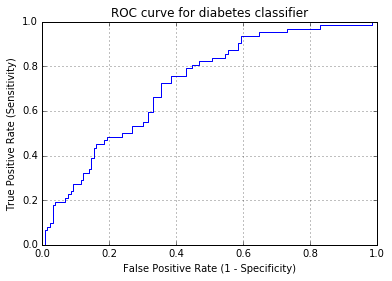

In [36]:
# Plotting ROC Curve
%matplotlib inline
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [37]:
# defining a function that accepts the threshold value and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [38]:
evaluate_threshold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [39]:
evaluate_threshold(0.8)

Sensitivity: 0.0
Specificity: 0.992307692308


AUC is the percentage of the ROC plot that is underneath the curve. AUC is important in determining the classifier's performance and is a useful metrics in case of an high class imbalance dataset. 

In [41]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("AUC Score:",metrics.roc_auc_score(y_test, y_pred_prob))

AUC Score: 0.724565756824


In [43]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
print("Cross-Validated AUC Score:",cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean())

Cross-Validated AUC Score: 0.737823361823
